In [1]:
from skimage import io, img_as_float
import numpy as np
import cv2
from scipy.signal import convolve2d
from scipy.ndimage.filters import convolve 

C:\Users\DELL\AppData\Local\Temp\ipykernel_15812\512854211.py:5: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [2]:
img = img_as_float(io.imread('imgs/BSE_25sigma_noisy.jpg', as_gray=True))

In [3]:
kernel = np.ones((5,5), np.float32)/25

In [4]:
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

In [5]:
conv_cv2 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)

In [6]:
conv_scipy_signal = convolve2d(img, kernel, mode='full')
conv_scipy_ndim = convolve(img, kernel, mode='reflect', cval=0.0)

In [7]:
cv2.imshow('original', img)
cv2.imshow('cv2 filter', conv_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## GAUSSIAN DE-NOISING FILTER 

In [8]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.filters import gaussian
import scipy.ndimage as ndimage 

In [9]:
gaussian_img = img_as_float(io.imread('imgs/BSE_25sigma_noisy.jpg', as_gray=True))
gaussian_pepper_img = img_as_float(io.imread('imgs/BSE_salt_pepper.jpg', as_gray=True))                           

In [10]:
img = gaussian_img
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

In [11]:
conv_cv2 = cv2.filter2D(img, -1, gaussian_kernel, borderType=cv2.BORDER_CONSTANT)
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
gaussian_skimg = gaussian(img, sigma = 10, mode='constant', cval=0.0)

In [12]:
cv2.imshow('original', img)
cv2.imshow('cv2 filter', conv_cv2)
cv2.imshow('gaussian', gaussian_using_cv2)
cv2.imshow('skimage', gaussian_skimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

## MEDIAN FILTER

In [13]:
import cv2 
import numpy as np
from skimage import io, img_as_float
from skimage.filters import median

In [14]:
img_salt_pepper = cv2.imread('imgs/BSE_salt_pepper.jpg', 0)
img = img_salt_pepper

In [15]:
median_blur = cv2.medianBlur(img, 3)

In [16]:
from skimage.morphology import disk
median_disk = median(img, disk(3), mode='constant', cval=0.0)

In [17]:
cv2.imshow('cv2', median_blur)
cv2.imshow('skimag', median_disk)
cv2.waitKey(0)
cv2.destroyAllWindows()

## BILATERAL FILTERING 
edge preserving denoising filter 
replace the p(x) with wtd avg of nearby p(x) values, also considers variations of intensities for edge preservation.

In [18]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.filters import median

In [19]:
img_gaussian_noise = cv2.imread('imgs/BSE_25sigma_noisy.jpg', 0)
img = img_gaussian_noise

In [20]:
bilateral = cv2.bilateralFilter(img, 5, 20, 100, borderType = cv2.BORDER_CONSTANT)

In [21]:
from skimage.restoration import denoise_bilateral

In [ ]:
bilateral_sk = denoise_bilateral(img, sigma_color=0.5, sigma_spatial = 15, channel_axis = None)

In [ ]:
cv2.imshow('cv', bilateral)
cv2.imshow('sk', bilateral_sk)
cv2.waitKey(0)
cv2.destroyAllWindows()

## NON LOCAL MEANS DENOISING FILTER

**Definition and Functionality**

The **Non-Local Means (NLM)** denoising filter is a sophisticated image processing technique designed to reduce noise while preserving important details in images. Unlike traditional local mean filters that only consider neighboring pixels, NLM evaluates all pixels in the image, calculating a weighted average based on the similarity of pixel patterns, regardless of their spatial proximity. This approach leverages the redundancy of similar patches within an image to effectively smooth out noise without blurring edges or critical structures, making it particularly valuable in applications requiring high detail preservation, such as medical imaging[1][2][3].

The mathematical formulation of the NLM filter can be expressed as follows:

$$
u(p) = \frac{1}{C(p)} \int_{\Omega} v(q) f(p,q) \, \mathrm{d}q
$$

Where:
- $$ u(p) $$ is the filtered value at point $$ p $$,
- $$ v(q) $$ is the unfiltered value at point $$ q $$,
- $$ f(p,q) $$ is the weighting function that determines the similarity between pixels,
- $$ C(p) $$ is a normalizing factor[1].

**Importance in Image Processing**

1. **Noise Reduction**: NLM effectively reduces various types of noise, including Gaussian and impulse noise, which are common in digital images. This capability is crucial for enhancing image quality in various applications.
  
2. **Detail Preservation**: By considering all pixels rather than just local neighborhoods, NLM maintains fine details and structures within images. This characteristic is essential for tasks requiring accurate representation of textures and edges.

3. **Versatility**: The NLM algorithm has been adapted for use in both 2D and 3D images, making it applicable across a range of imaging modalities[5].

## Application in Medical Imaging

In medical imaging, particularly with modalities like **CT scans** and **MRI**, the importance of non-local means denoising becomes even more pronounced:

- **CT Scans**: CT images often suffer from high levels of noise due to low radiation doses used during scans. The NLM filter helps enhance the clarity of anatomical structures by effectively reducing noise while preserving critical details necessary for diagnosis[4][6].

- **MRI**: MRI scans are particularly susceptible to Rician noise, which can obscure important diagnostic information. The NLM filter has shown superior performance in denoising 3D MR images by calculating weighted averages based on pixel similarities across the entire image volume. This method not only reduces noise but also corrects biases introduced during image acquisition[5][6].

### Benefits in Medical Imaging

- **Improved Diagnostic Accuracy**: By enhancing image clarity and detail, NLM aids radiologists in making more accurate diagnoses.
  
- **Edge Preservation**: The ability to maintain edge integrity ensures that critical features, such as tumors or lesions, are clearly visible.

- **Adaptability**: NLM can be tailored to specific imaging challenges, such as varying noise levels across different imaging sessions or patient populations.

Overall, the non-local means denoising filter represents a significant advancement in image processing techniques, particularly within the medical field where clarity and detail are paramount for egithub.io/mexopencv/opencv/non_local_means_demo.html

In [ ]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

In [ ]:
img = img_as_float(io.imread('imgs/BSE_25sigma_noisy.jpg'))

In [ ]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=None))

In [ ]:
denoise_img = denoise_nl_means(img, 

# NON LOCAL MEANS DENOISING ALGO

similar pixel neighbourhoods gives larger weights 

In [2]:
## TV - total variation 
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

In [3]:
img = img_as_float(io.imread('imgs/BSE_25sigma_noisy.jpg', as_gray=True))

In [6]:
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, max_num_iter=200, channel_axis=None)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 <a list of 901 BarContainer objects>)

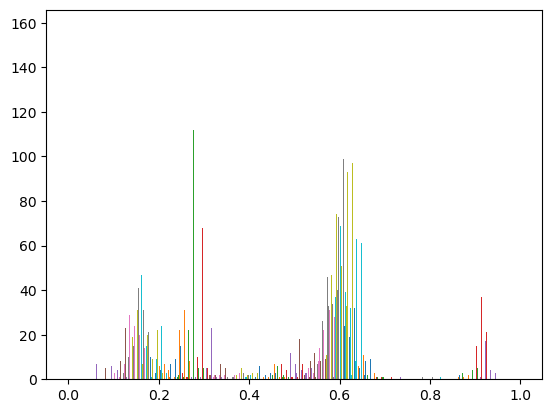

In [7]:
plt.hist(denoise_img, bins=100, range=(0,1))

(array([ 6067.,  3879.,  3068.,  5263.,  3809.,  6349.,  4676.,  7430.,
         5336.,  8363.,  8801.,  6127.,  9639.,  6511., 10132.,  6782.,
        10300.,  6896., 10589.,  6760., 10207., 10188.,  6365.,  9471.,
         6155.,  8864.,  5531.,  8158.,  5196.,  7490.,  6941.,  4610.,
         6458.,  4115.,  5836.,  3760.,  5723.,  3694.,  5539.,  3673.,
         5582.,  5726.,  4129.,  6711.,  4664.,  7568.,  5399.,  8675.,
         6083.,  9767., 10700.,  7634., 11798.,  8429., 13204.,  9155.,
        14095.,  9746., 14592.,  9771., 14859., 14616.,  9583., 13877.,
         8839., 12763.,  8148., 11708.,  7194.,  9913.,  9062.,  5302.,
         7531.,  4480.,  5866.,  3444.,  4683.,  2788.,  3682.,  2149.,
         2902.,  2497.,  1639.,  2252.,  1451.,  2116.,  1371.,  2160.,
         1466.,  2215.,  2440.,  1686.,  2649.,  1871.,  2858.,  1916.,
         2874.,  1757.,  2432.,  4096.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

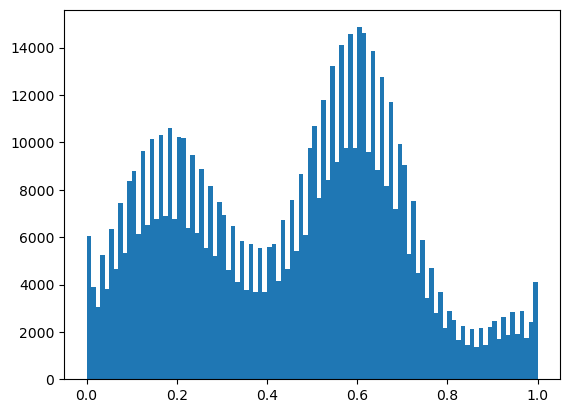

In [4]:
plt.hist(img.flat, bins=100, range=(0,1))

In [8]:
cv2.imshow('Original', img)
cv2.imshow('denoised', denoise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# BM3D - MRI 

In [9]:
from skimage import io, img_as_float
import bm3d
import cv2

In [10]:
noisy_img = img_as_float(io.imread('imgs/BSE_25sigma_noisy.jpg', as_gray=True))

In [11]:
bm3d_denoise = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)

In [12]:
cv2.imshow('original', noisy_img)
cv2.imshow('Denoised', bm3d_denoise)
cv2.waitKey(0)
cv2.destroyAllWindows()

# UNSHARP MASK

In [13]:
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

In [16]:
img = img_as_float(io.imread('imgs/einstein_blurred.jpg', as_gray=True))
gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)
amount = 1.0

In [17]:
img2 = (img - gaussian_img) * amount

In [18]:
img3 = img + img2

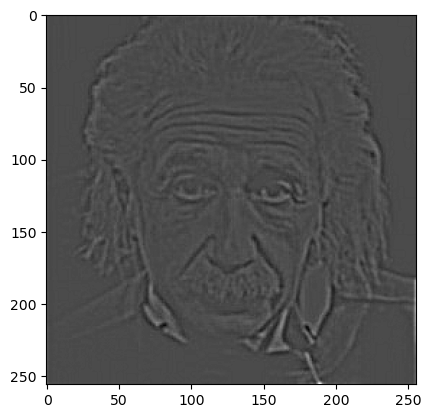

In [20]:
from matplotlib import pyplot as plt
plt.imshow(img2, cmap='gray')

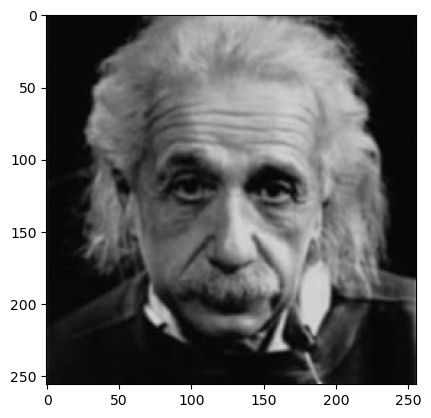

In [21]:
plt.imshow(img3, cmap='gray')

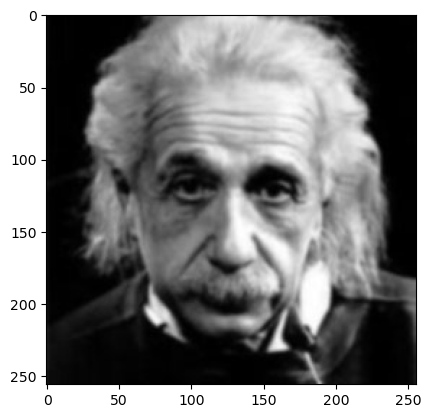

In [22]:
plt.imshow(img, cmap='gray')

In [23]:
from skimage import io
from skimage.filters import unsharp_mask

In [24]:
img = io.imread('imgs/einstein_blurred.jpg')
unsaharp_img = unsharp_mask(img, radius=3, amount=1.0)                           

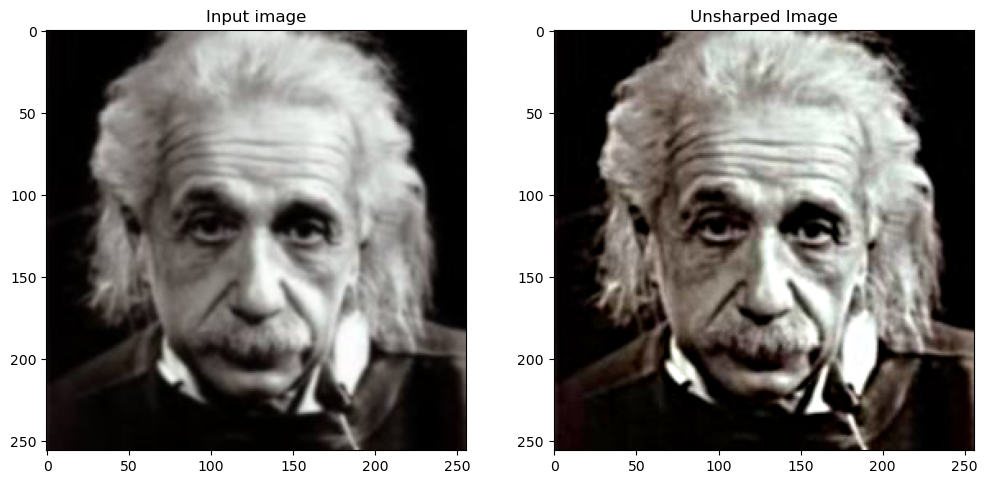

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsaharp_img, cmap='gray')
ax2.title.set_text('Unsharped Image')
plt.show()

In [ ]:
l